<a href="https://colab.research.google.com/github/Akshath6060/mca_cc/blob/main/cc_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [ ]:
# read the data set
df=pd.read_csv('/content/50_startups_sample.csv')
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:


# Features (independent variables)
X = df.drop("Profit", axis=1)

# Convert categorical columns to dummy variables (if 'State' exists)
X = pd.get_dummies(X, drop_first=True)

# Target (dependent variable)
y = df["Profit"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = model.score(X_test, y_test)

print("Mean Squared Error:", mse)
print("R² Score:", r2)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Example prediction (adjust based on column order)
example = np.array([[50000, 40000, 30000, 1, 0]])
print("\nExample Prediction:", model.predict(example))


Mean Squared Error: 6275836289.758329
R² Score: nan
Accuracy: nan%

Example Prediction: [-2280.864421]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Columns: [Size(sqft), Bedrooms, Age]
X = np.array([
    [1000, 2, 10],
    [1500, 3, 5],
    [2000, 3, 20],
    [2500, 4, 15],
    [1800, 3, 8],
    [1200, 2, 12],
    [3000, 4, 30],
    [2200, 3, 25]
])

# Target: House Price
y = np.array([200000, 300000, 400000, 500000, 350000, 220000, 600000, 420000])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Predicted Prices:", y_pred)
print("Actual Prices   :", y_test)


user_input = np.array([[2000, 3, 10]])
predicted_price = model.predict(user_input)

print("\nPredicted Price for User Input:", predicted_price[0])


Predicted Prices: [306691.77288528 225898.03012746]
Actual Prices   : [300000 220000]

Predicted Price for User Input: 376216.6859791426


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("/content/car.data", header=None)

df.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

In [ ]:
print("Null values in the dataset:")
print(df.isnull().sum())

Null values in the dataset:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [ ]:
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
X = pd.get_dummies(df.drop("class", axis=1), drop_first=True)
y = df["class"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

example = np.array([[2, 1, 2, 2, 1, 2]])
print("\nExample Prediction (encoded):", model.predict(example))
print("Example Prediction (decoded):", label_encoders['class'].inverse_transform(model.predict(example)))

Accuracy: 0.9739884393063584

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.65      1.00      0.79        11
           2       0.99      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.98       346


Confusion Matrix:
 [[ 75   6   2   0]
 [  0  11   0   0]
 [  0   0 235   0]
 [  1   0   0  16]]

Example Prediction (encoded): [1]
Example Prediction (decoded): ['good']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


print("\nExample Prediction:", iris.target_names[model.predict([X_test[0]])])


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Example Prediction: ['versicolor']


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df = df.drop("CustomerID", axis=1)

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
features_for_clustering = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(features_for_clustering)


In [ ]:
X = df[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]
y = df["Cluster"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

NameError: name 'y_test' is not defined

cnn

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=1)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.2f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 51s 56ms/step - accuracy: 0.8287 - loss: 0.5359 - val_accuracy: 0.9822 - val_loss: 0.0564
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 75s 49ms/step - accuracy: 0.9712 - loss: 0.0973 - val_accuracy: 0.9890 - val_loss: 0.0388
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9800 - loss: 0.0674 - val_accuracy: 0.9882 - val_loss: 0.0372
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9834 - loss: 0.0548 - val_accuracy: 0.9903 - val_loss: 0.0336
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9851 - loss: 0.0484 - val_accuracy: 0.9908 - val_loss: 0.0335
Test Accuracy: 0.99


Random Forest Performance:
MAE:  18.50
RMSE: 28.78
R²:   0.936
Accuracy:  93.62%


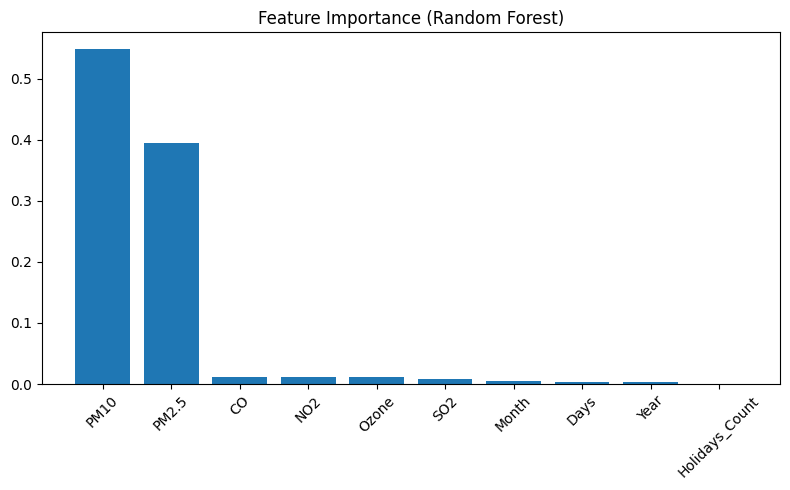

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/final_dataset.csv"   # change path if needed
df = pd.read_csv(file_path)

# Features and target
X = df.drop(columns=["AQI", "Date"])  # drop AQI (target) and redundant Date column
y = df["AQI"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Performance:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")
print(f"Accuracy:  {r2*100:.2f}%")

# Feature Importance
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Load dataset
file_path = "/content/flood.csv"
df = pd.read_csv(file_path)

# Features and target
X = df.drop("FloodProbability", axis=1)
y = df["FloodProbability"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Accuracy:  {r2*100:.2f}%")


Model Performance:
R² Score: 0.7305
Mean Absolute Error: 0.0205
Root Mean Squared Error: 0.0259
Accuracy:  73.05%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from xgboost import XGBRegressor

# Load dataset
file_path = "//content/flood.csv"
df = pd.read_csv(file_path)

# Features and target
X = df.drop("FloodProbability", axis=1)
y = df["FloodProbability"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model - XGBoost Regressor
model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("XGBoost Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Accuracy:  {r2*100:.2f}%")

XGBoost Model Performance:
R² Score: 0.9672
Mean Absolute Error: 0.0071
Root Mean Squared Error: 0.0090
Accuracy:  96.72%


# Task
Create a machine learning model using the dataset located at "/content/imdb_movies.csv". Preprocess the data as necessary, choose an appropriate model, and train it.

## Load the dataset

### Subtask:
Load the data from the provided `/content/imdb_movies.csv` file into a pandas DataFrame.


**Reasoning**:
Load the data from the specified CSV file into a pandas DataFrame and display the first few rows to confirm.



In [ ]:
df = pd.read_csv("/content/imdb_movies.csv")
display(df.head())

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Changed from RandomForestRegressor to XGBoost
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/imdb_movies.csv")

# Handle missing values in 'genre' and 'crew' columns
df.dropna(subset=['genre', 'crew'], inplace=True)

# Split the 'genre' column into individual genres and create dummy variables
df['genre'] = df['genre'].str.split(',\xa0')
genre_dummies = df['genre'].str.join('|').str.get_dummies()

# Drop the original 'genre' column and concatenate the new genre dummy variables
df = pd.concat([df.drop('genre', axis=1), genre_dummies], axis=1)

# Apply one-hot encoding to other categorical columns
categorical_cols = ['status', 'orig_lang', 'country']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features and target
X = df.drop(columns=['score', 'names', 'date_x', 'overview', 'crew', 'orig_title'])
y = df['score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model - XGBoost Regressor
# Changed from RandomForestRegressor to XGBRegressor
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance:
Mean Absolute Error (MAE): 5.5405
Root Mean Squared Error (RMSE): 7.4361
R-squared (R²): 0.6572


## Explore and preprocess data

### Subtask:
Examine the data for missing values, data types, and distributions. Handle any categorical features using techniques like one-hot encoding.


**Reasoning**:
Examine the data for missing values and data types.



In [ ]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nData types:")
df.info()

Missing values per column:
names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


**Reasoning**:
Handle missing values in 'genre' and 'crew' columns by dropping rows, and then apply one-hot encoding to the identified categorical columns.



In [ ]:
df.dropna(subset=['genre', 'crew'], inplace=True)

categorical_cols = ['status', 'orig_lang', 'country']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df.head())

,names,date_x,score,genre,overview,crew,orig_title,budget_x,revenue,status_ Post Production,...,country_SU,country_TH,country_TR,country_TW,country_UA,country_US,country_UY,country_VN,country_XC,country_ZA
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,75000000.0,2.716167e+08,False,...,False,False,False,False,False,False,False,False,False,False
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,460000000.0,2.316795e+09,False,...,False,False,False,False,False,False,False,False,False,False
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,100000000.0,7.244590e+08,False,...,False,False,False,False,False,False,False,False,False,False
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,12300000.0,3.420000e+07,False,...,False,False,False,False,False,False,False,False,False,False
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,77000000.0,3.409420e+08,False,...,False,False,False,False,False,True,False,False,False,False


**Reasoning**:
Verify that there are no remaining missing values and that the categorical columns have been successfully encoded.



In [ ]:
print("Missing values after preprocessing:")
print(df.isnull().sum().sum())

print("\nData types after preprocessing:")
df.info()

Missing values after preprocessing:
0

Data types after preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 10052 entries, 0 to 10177
Columns: 119 entries, names to country_ZA
dtypes: bool(110), float64(3), object(6)
memory usage: 1.8+ MB


## Define features and target

### Subtask:
Separate the dataset into features (input variables) and the target variable (what you want to predict).


**Reasoning**:
Define the features X and the target variable y based on the instructions.



In [ ]:
X = df.drop(columns=['score', 'names', 'date_x', 'overview', 'crew', 'orig_title'])
y = df['score']
display(X.head())
display(y.head())

,genre,budget_x,revenue,status_ Post Production,status_ Released,orig_lang_ Basque,orig_lang_ Bengali,"orig_lang_ Bokmål, Norwegian, Norwegian Bokmål",orig_lang_ Cantonese,"orig_lang_ Catalan, Valencian",...,country_SU,country_TH,country_TR,country_TW,country_UA,country_US,country_UY,country_VN,country_XC,country_ZA
0,"Drama, Action",75000000.0,2.716167e+08,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Science Fiction, Adventure, Action",460000000.0,2.316795e+09,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"Animation, Adventure, Family, Fantasy, Comedy",100000000.0,7.244590e+08,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,"Animation, Comedy, Family, Adventure, Fantasy",12300000.0,3.420000e+07,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Action,77000000.0,3.409420e+08,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


,score
0,73.0
1,78.0
2,76.0
3,70.0
4,61.0


## Split data

### Subtask:
Split the data into training and testing sets for model evaluation.


**Reasoning**:
Split the features and target into training and testing sets and verify their shapes.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8041, 113)
Shape of X_test: (2011, 113)
Shape of y_train: (8041,)
Shape of y_test: (2011,)


## Choose and train model

### Subtask:
Select an appropriate machine learning model based on the target variable (classification or regression) and train it on the training data.


**Reasoning**:
Select and train a RandomForestRegressor model on the training data as the target variable 'score' is continuous, indicating a regression problem.



In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'War,\xa0Drama,\xa0History'

**Reasoning**:
The error indicates that there are still non-numeric values in the features DataFrame X_train, likely in the 'genre' column which was not one-hot encoded previously. The 'genre' column should be handled as it contains multiple genres per movie, which can be addressed by creating dummy variables for each unique genre.



In [ ]:
# Split the 'genre' column into individual genres and create dummy variables
df['genre'] = df['genre'].str.split(',\xa0')
genre_dummies = df['genre'].str.join('|').str.get_dummies()

# Drop the original 'genre' column and concatenate the new genre dummy variables
df = pd.concat([df.drop('genre', axis=1), genre_dummies], axis=1)

# Redefine features and target after preprocessing the 'genre' column
X = df.drop(columns=['score', 'names', 'date_x', 'overview', 'crew', 'orig_title'])
y = df['score']

# Split the data again after reprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Evaluate model

### Subtask:
Evaluate the trained model's performance on the test data using relevant metrics.


**Reasoning**:
Calculate evaluation metrics for the trained model.



In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 5.3935
Root Mean Squared Error (RMSE): 7.4327
R-squared (R²): 0.6575


## Summary:

### Data Analysis Key Findings

*   The dataset initially contained missing values in the 'genre' (85) and 'crew' (56) columns.
*   After preprocessing, which included dropping rows with missing values in 'genre' and 'crew' and applying one-hot encoding to 'status', 'orig\_lang', and 'country', there were no missing values remaining.
*   The 'genre' column, which contained multiple genres per movie, was successfully split and converted into dummy variables.
*   The data was split into training (8041 samples) and testing (2011 samples) sets, with 113 features.
*   A `RandomForestRegressor` model was successfully trained on the preprocessed training data.
*   The model's performance on the test set resulted in a Mean Absolute Error (MAE) of 5.3935, a Root Mean Squared Error (RMSE) of 7.4327, and an R-squared (R²) of 0.6575.

### Insights or Next Steps

*   The R² value of 0.6575 indicates that approximately 65.75% of the variance in the movie scores can be explained by the model, suggesting a reasonably good fit but with room for improvement.
*   Further steps could involve exploring other regression models, hyperparameter tuning the `RandomForestRegressor`, or incorporating additional relevant features to potentially improve the model's performance metrics (MAE, RMSE, R²).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/gym_members_exercise_tracking_synthetic_data.csv")

# Fix Max_BPM (convert to numeric)
df["Max_BPM"] = pd.to_numeric(df["Max_BPM"], errors="coerce")

# Handle missing values (fill numeric with mean, categorical with mode)
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

# Encode categorical variables
label_encoders = {}
for col in ["Gender", "Workout_Type"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features (X) and target (y)
X = df.drop("Calories_Burned", axis=1)
y = df["Calories_Burned"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"Accuracy:  {r2*100:.2f}%")


/tmp/ipython-input-2575104557.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-2575104557.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Model Performance:
MAE: 255.08
RMSE: 316.70
R²: 0.01
Accuracy:  0.53%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load dataset
df = pd.read_csv("/content/gym_members_exercise_tracking_synthetic_data.csv")

# Fix Max_BPM (convert to numeric)
df["Max_BPM"] = pd.to_numeric(df["Max_BPM"], errors="coerce")

# Handle missing values (fill numeric with mean, categorical with mode)
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

# Encode categorical variables
label_encoders = {}
for col in ["Gender", "Workout_Type"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features (X) and target (y)
X = df.drop("Calories_Burned", axis=1)
y = df["Calories_Burned"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train XGBoost model
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("XGBoost Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"Accuracy:  {r2*100:.2f}%")


/tmp/ipython-input-1711079615.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-1711079615.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

XGBoost Model Performance:
MAE: 268.70
RMSE: 333.73
R²: -0.10
Accuracy:  -10.46%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load dataset
df = pd.read_csv("/content/gym_members_exercise_tracking_synthetic_data.csv")

# Convert Max_BPM to numeric
df["Max_BPM"] = pd.to_numeric(df["Max_BPM"], errors="coerce")

# Handle missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# Encode categorical variables
for col in ["Gender", "Workout_Type"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Features & Target
X = df.drop("Calories_Burned", axis=1)
y = df["Calories_Burned"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model (no scaling)
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("XGBoost Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"Accuracy:  {r2*100:.2f}%")


XGBoost Model Performance:
MAE: 258.67
RMSE: 323.42
R²: -0.04
Accuracy:  -3.74%


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))

Linear Regression R²: 0.008767419347825212


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/gym_members_exercise_tracking_synthetic_data.csv")

# Convert Max_BPM to numeric
df["Max_BPM"] = pd.to_numeric(df["Max_BPM"], errors="coerce")

# Handle missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# Encode categorical variables
for col in ["Gender", "Workout_Type"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Features & Target
X = df.drop("Calories_Burned", axis=1)
y = df["Calories_Burned"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"Accuracy:  {r2*100:.2f}%")


Linear Regression Model Performance:
MAE: 252.93
RMSE: 316.15
R²: 0.01
Accuracy:  0.88%
